## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
(df.converted == 1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
((df.group == 'treatment') & (df.landing_page != 'new_page')).sum()

1965

In [7]:
((df.group == 'control') & (df.landing_page != 'old_page')).sum()

1928

f. Do any of the rows have missing values?

<font color='green'>
After running the next 2 commands we can confirm that there are no missing values. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [9]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

<font color="green">
In the next 2 cells I created a new dataframe df2 that contains only the records where group and landing page match and confirmed that in fact we do not have mismatching records.

In [10]:
df2 = (df
.query('group == "control" and landing_page == "old_page" or group =="treatment" and landing_page == "new_page"')).copy()

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

<font color="green">
From time to time I print a row of the dataset to have the column names handy as well as givin a quick glance at the values each column is storing.

In [12]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated(subset='user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

<font color="green">
As we can see below, the records corresponding to the one user with two records have the same information in the columns we care about. 

In [15]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

<font color="green">
In the next cell we remove one of the duplicated records and then in the next one it is confirmed that there are no longer duplicated records by user id.

In [16]:
df2.drop_duplicates(subset='user_id', inplace=True)

In [17]:
df2[df2.duplicated(subset='user_id')]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

<font color="green">
The column Converted already has 1 and 0 values, making it easier to calculate probabilities by just taking the mean.

In [18]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

<font color="green">
To calculate probability of conversion within a specific group, we need the number of converted in that group as well as the total number for that group and divide the numbers as shown below. First for control group, then the treatment group.

In [19]:
ctr_converted = df2.query('group == "control" and converted == 1').shape[0]
ctr_converted

17489

In [20]:
ctr_total = df2.query('group == "control"').shape[0]
ctr_total

145274

In [21]:
prob_ctr_converted = ctr_converted / ctr_total
prob_ctr_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
treat_converted = df2.query('group == "treatment" and converted == 1').shape[0]
treat_converted

17264

In [23]:
treat_total = df2.query('group == "treatment"').shape[0]
treat_total

145310

In [24]:
prob_treat_converted = treat_converted / treat_total
prob_treat_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

<font color="green">
To calculate this probability we just need to get the number of individuals getting the new page regardless of the group and divide that by the total number of rows which is the total number of individuals.

In [25]:
new_page_count = df2.query('landing_page == "new_page"').shape[0]
new_page_count

145310

In [26]:
prob_new_page = new_page_count / df2.shape[0]
prob_new_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

<font color='green'>

I do not think that there is enough evidence to conclude that the new treatment page leads to more conversions. Here are the calculated probabilities:

- Probability of converting regardless of page: 0.1196


- Given that an individual was in the control group, the probability of converting: 0.1204


- Given that an individual was in the treatment group, the probability of converting: 0.1188


- The probability of receiving the new page: 0.5001

Based on those numbers, we should not make a conclusion saying that the new treatment page leads to more conversions. It actually tends in the opposite direction but seems to not be practically significant.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

<font color='green'>

The null hypothesis should be that the control group has a better or equal conversion rate than the treatment group.

$H_0:  p_{new} <= p_{old}  $

The alternative hypothesis should be that the treatment group has a higher conversion rate compared to the control group.

$H_1:  p_{new} > p_{old} $

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

<font color="green">
As mentioned before, I usually run the df.head() function just to have the column names handy as well as give a quick glance to the values each colunm stores.

In [27]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


a. What is the **conversion rate** for $p_{new}$ under the null? 

<font color='green'>

Based on the instructions: "assume they are equal to the converted rate in ab_data.csv regardless of the page", my undestanding is that p_new and p_old should be the probability of conversion without taking into consideration the group. 

Based on that both conversion rates are 0.1195, which is the number calculated back during exercise 4 part a.


In [28]:
df2.converted.mean()

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [29]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

In [30]:
p_new = p_old

c. What is $n_{new}$, the number of individuals in the treatment group?

In [31]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [32]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [33]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

<font color="green">
I first ran  the binomial function with random values 10,.5,3 just to confirm my understanding of the documentation.

In [34]:
test = np.random.binomial(10, .5, 3)
test

array([4, 2, 6])

<font color="green">
Here I executed the actual task requested in exercise e.

In [35]:
new_page_converted = np.random.binomial(n_new, p_new, 1)
new_page_converted

array([17236])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

<font color="green">
Similar thing but now with the n_old and p_old values.

In [36]:
old_page_converted = np.random.binomial(n_old, p_old, 1)
old_page_converted

array([17383])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

<font color="green">
With the values obtained in the previous exercises, I directly calculated the p_new and P_old and substracted them.

In [37]:
new_page_converted / n_new - old_page_converted / n_old

array([-0.00104127])

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

<font color="green">
Same as the previous exercise but this time scaling it up to 10000 values.

In [38]:
p_diffs = []
new_page_converted_10k = np.random.binomial(n_new, p_new, 10000) / n_new
old_page_converted_10k = np.random.binomial(n_old, p_old, 10000) / n_old
p_diffs = new_page_converted_10k - old_page_converted_10k

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<font color="green">
I had not previously calculated the observed difference. I calculated it below to use it as vertical line in the histogram below.

In [39]:
obs_diff = prob_treat_converted - prob_ctr_converted
obs_diff

-0.0015782389853555567

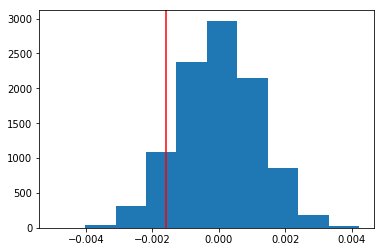

In [40]:
np.array(p_diffs)
plt.hist(p_diffs)
plt.axvline(obs_diff, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [41]:
(p_diffs > obs_diff).mean()

0.9032

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

<font color='green'>

The value calculated in part j is called p_value.


Large p-values suggest that we should not move away from the null hypothesis. In this case, p-value is 0.90, so we fail to reject the null hypothesis. Null hypothesis is that $H_0:  p_{new} <= p_{old}  $

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

<font color="green">
Once again, getting a reminder of the dataset structure and values for reference. And then calculated and stored the values required for the exercise.

In [42]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [43]:
df2.group.value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

In [44]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == "1"').shape[0]
convert_new = df2.query('group == "treatment" and converted == "1"').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

<font color="green">
I ran the ztest function with random numbers just to get a glance at the output to confirm my understanding of the documentation.

In [45]:
stat, pval = sm.stats.proportions_ztest(5, 83, 0.05)
pval

0.69496509811484763

<font color="green">
The calculated the below total variables to confirm that the numbers matched the number of observations in the df2 dataset.

In [46]:
convert_total = convert_old + convert_new
convert_total

34753

In [47]:
n_total = n_old + n_new
n_total

290584

<font color="green">
I then proceeded to execute the ztest function with the actual values.

In [48]:
stat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller', prop_var=False)
pval

0.90505831275902449

In [49]:
stat

1.3109241984234394

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<font color='green'>

According to wikipedia, the absolute value of z represents the distance between that raw score x and the population mean in units of the standard deviation. 

The values calculated using the ztest function seem to agree with the findings in parts j and k. the p-value is .905 versus 0.9031 in j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

<font color='green'>
Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.



<font color='green'>
In this section I set up the preparation required before running the logistic regression function.

In [50]:
df2['intercept'] = 1

In [51]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1


In [52]:
dummy_group = pd.get_dummies(df.group)
dummy_group.head(1)

,control,treatment
0,1,0


In [53]:
dummy_group.rename(columns={"treatment":"ab_page"}, inplace=True)

In [54]:
dummy_group.head(1)

,control,ab_page
0,1,0


In [55]:
df2['ab_page'] = dummy_group.ab_page

In [56]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [57]:
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [58]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-08 15:50 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?



In [59]:
np.exp(-0.0150), 1 / np.exp(-0.0150)

(0.98511193960306265, 1.0151130646157189)

**Put your answer here.**

<font color='green'>
    
The p-value associated with ab_page is 0.1899. The difference with this p-value and the p-value in part II is that in this exercise we are getting a two-tailed test. That is it uses both the positive and negative tails of the distribution. In part II I had only one side test because my null hypothesis has p_new <= p_old.

Interpretation: On the new page conversion is 98.51 times as likely than old page holding all else constant. Or saying it in other terms, on the old page conversion is 1.015 times as likely than on the new page holding all else constant.

We can see that these results match the results obtained previously, and we would fail to reject the null hypothesis where the null hypothesis says that both pages have the same conversion rate.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


**Put your answer here.**

<font color='green'>
It is a good idea to consider other factors because that way we can see how those play in the overall decision process. 

Some of the disadvantages to adding additional tems are that we can have multicollinearity which impact the model coefficients and standard errors.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.



<font color='green'>

These first cells are to prepare for the actual run of the model. Load the file, take a glance of the new and previous dataset, join the datasets together, create the dummy variables.

In [60]:
countries_df = pd.read_csv('countries.csv')
countries_df.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [61]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0


In [62]:
countries_df.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [63]:
df2 = df2.join(countries_df.set_index('user_id'), on='user_id', rsuffix='_other')
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US


In [64]:
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2.country)
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1


In [65]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1




<font color='green'>

With all the pre-work complete, I can proceed to run and fit the model and finally get the summary of the results.

In [66]:
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [67]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-08 15:50 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""



<font color='green'>
To interpret the dummy variable coefficients in logistic regression we need to exponentiate the coefficients. 
If the result is a number below 1, it is easier to interpret the results by getting the inverse and use decrease unit instead of increase unit.


In [68]:
np.exp(-0.0408), 1 / np.exp(-0.0408), np.exp(0.0099), 1 / np.exp(0.0099)

(0.96002111497165088,
 1.0416437559600236,
 1.0099491671175422,
 0.99014884368295708)

<font color='green'>

Interpretation: 

1. Holding all else constant on the old page and US the conversion is 1.04 times as likely than on CA.
2. Holding all else constant on UK the conversion is 1.001 times as likely as on the old page on US.

Seems like the results are not statistically significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [69]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1


In [70]:
df2['UK_abpage'] = df2.UK * df2.ab_page # It is going to return 1 only when it is UK and new page?
df2['CA_abpage'] = df2.CA * df2.ab_page
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,UK_abpage,CA_abpage
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0


In [71]:
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK', 'CA_abpage', 'UK_abpage' ]])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [72]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-08 15:50 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_abpage    -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_abpage     0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

<font color='green'>
             
Conclusions based on the summary result.

Based on the theory, when we add interactions we need to include the lower order tems. For that reason I added ab_page, CA and UK as well as the higher order terms CA_abpage and UK_abpage.

If we look ar the R-squared, it did not change compared to the summary without the higher order terms. Based on that, it does not look like it will help the model to add higher order terms because it is adding complexity without seeing significant difference in the R-squared.


Overall Conclusion.

Based on the different models run, there is no practical significance between the control group and the treatment group. My advise based on the results obtained so far would be to not deploy the new page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0